In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
df=pd.read_csv('titanic_toy.csv')

In [19]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [20]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [21]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [24]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [25]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()


In [26]:
x_train.sample(5)

,Age,Fare,Family
467,56.0,26.55,0
297,2.0,151.55,3
131,20.0,7.05,0
880,25.0,26.00,1
116,70.5,7.75,0


In [28]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)


In [ ]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
443,28.0,13.0000,0,28.0,28.000000,13.0000,13.000000
753,23.0,7.8958,0,23.0,23.000000,7.8958,7.895800
531,NaN,7.2292,0,28.0,29.498846,7.2292,7.229200
336,29.0,NaN,1,29.0,29.000000,14.4000,32.517788
378,20.0,NaN,0,20.0,20.000000,14.4000,32.517788


In [30]:
print('Original Age variable variance:',x_train['Age'].var())
print(' Age variable variance after median imputation:',x_train['Age_median'].var())
print(' Age variable variance after mean imputation:',x_train['Age_mean'].var())

print('Original Fare variable variance:',x_train['Fare'].var())
print(' Fare variable variance after median imputation:',x_train['Fare_median'].var())
print(' Fare variable variance after mean imputation:',x_train['Fare_mean'].var())

Original Age variable variance: 210.2517072477435
 Age variable variance after median imputation: 169.20731007048155
 Age variable variance after mean imputation: 168.85193366872227
Original Fare variable variance: 2761.0314349486343
 Fare variable variance after median imputation: 2637.012481677765
 Fare variable variance after mean imputation: 2621.232374951235


<Axes: ylabel='Density'>

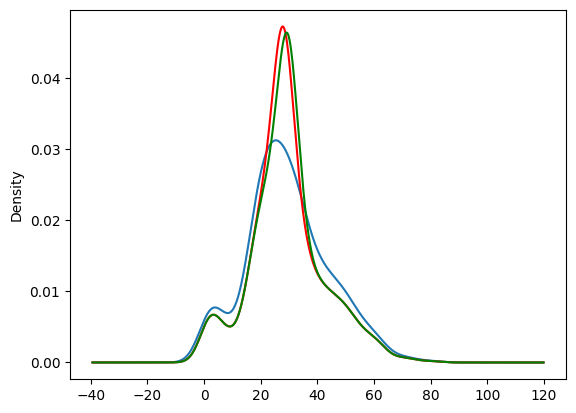

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variance distribution
x_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with the median
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')

#variance imputed with the mean
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

<Axes: ylabel='Density'>

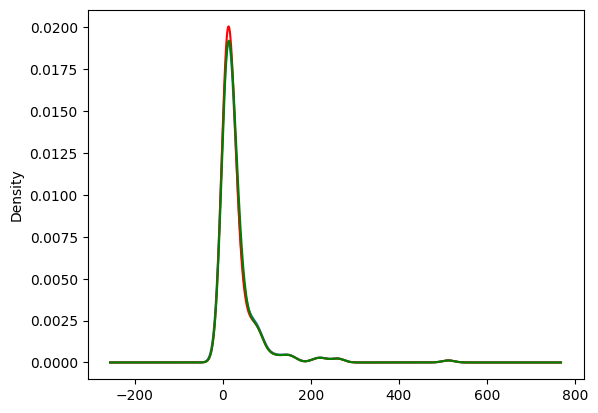

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variance distribution
x_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with the median
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

#variance imputed with the mean
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

In [34]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [35]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

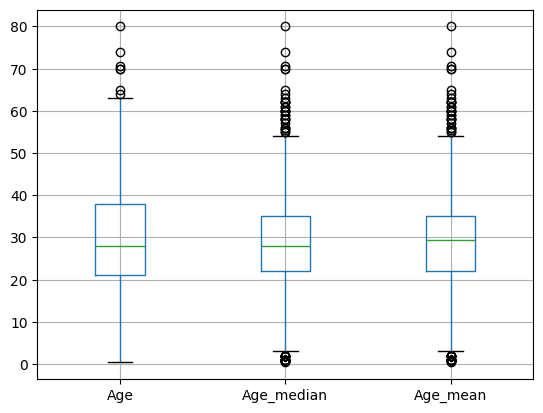

In [37]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

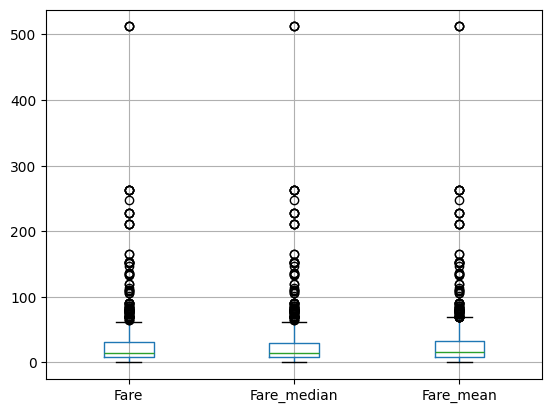

In [38]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

**using sklearn**

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [42]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [43]:
trf.fit(x_train)

c:\Program Files\Python39\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [44]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [45]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [46]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [47]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])